# Simple Linear Regression

In [61]:
import numpy as np
import pandas as pd
import quandl
quandl.ApiConfig.api_key = 'PGNosZasWCLCBMfGND4h'

%matplotlib inline

In [62]:
#get data from quandl
spy_table = quandl.get('BCIW/_SPXt')
amzn_table = quandl.get('WIKI/AMZN')

In [63]:
#fetch data from Jan 2017 to Jun 2017
spy = spy_table.loc['2017':'2017-6',['Close']]
amzn = amzn_table.loc['2017':'2017-6',['Close']]

In [64]:
#calculate log return
spy_log = np.log(spy.Close).diff().dropna()
amzn_log = np.log(amzn.Close).diff().dropna()
df = pd.concat([spy_log,amzn_log],axis = 1).dropna()
df.columns = ['spy','amzn']
print df.tail()

                 spy      amzn
Date                          
2017-06-26  0.000327 -0.009771
2017-06-27 -0.008105 -0.017456
2017-06-28  0.008968  0.013777
2017-06-29 -0.008606 -0.014647
2017-06-30  0.001583 -0.008159


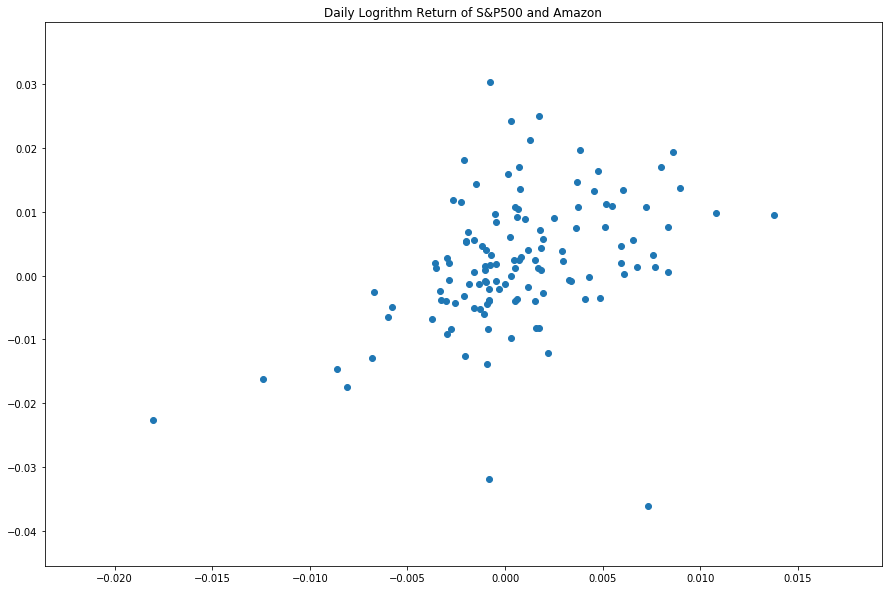

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.scatter(df['spy'],df.amzn)
plt.title("Daily Logrithm Return of S&P500 and Amazon")
plt.show()

In [66]:
import statsmodels.formula.api as sm
model = sm.ols(formula='amzn~spy',data=df).fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:                   amzn   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     24.17
Date:                Sun, 01 Oct 2017   Prob (F-statistic):           2.78e-06
Time:                        01:20:13   Log-Likelihood:                 404.49
No. Observations:                 124   AIC:                            -805.0
Df Residuals:                     122   BIC:                            -799.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0014      0.001      1.653      0.1

In [67]:
print 'parameters: ',model.params
print 'residual: ',model.resid.tail()
print 'fitted values: ',model.predict()

parameters:  Intercept    0.001403
spy          0.944222
dtype: float64
residual:  Date
2017-06-26   -0.011483
2017-06-27   -0.011205
2017-06-28    0.003907
2017-06-29   -0.007925
2017-06-30   -0.011056
dtype: float64
fitted values:  [  7.00330393e-03   6.84751623e-04   5.00962467e-03  -1.94924584e-03
   1.40721020e-03   4.15839302e-03  -6.02149553e-04   3.14526213e-03
  -1.40351587e-03   3.22327722e-03  -1.99505010e-03   4.60518951e-03
  -1.11499153e-03   7.58427484e-03   8.95181985e-03   7.28259633e-04
   6.33141524e-04  -4.24511302e-03   5.67251125e-04   1.89868222e-03
   1.99793632e-03   8.32145177e-03  -5.92080306e-04   1.66106107e-03
   2.35759707e-03   6.99360776e-03   4.81940510e-03   6.58506663e-03
   5.44856017e-03   6.24122161e-03   6.83194347e-04   3.00509008e-03
   7.09766824e-03   4.67223712e-04   1.90725648e-03   3.03925558e-03
   2.49637160e-03  -1.00621358e-03   1.43965433e-02  -4.07194906e-03
   1.90488532e-03  -1.67548308e-03  -1.28855741e-03  -4.83833962e-04
   2.16

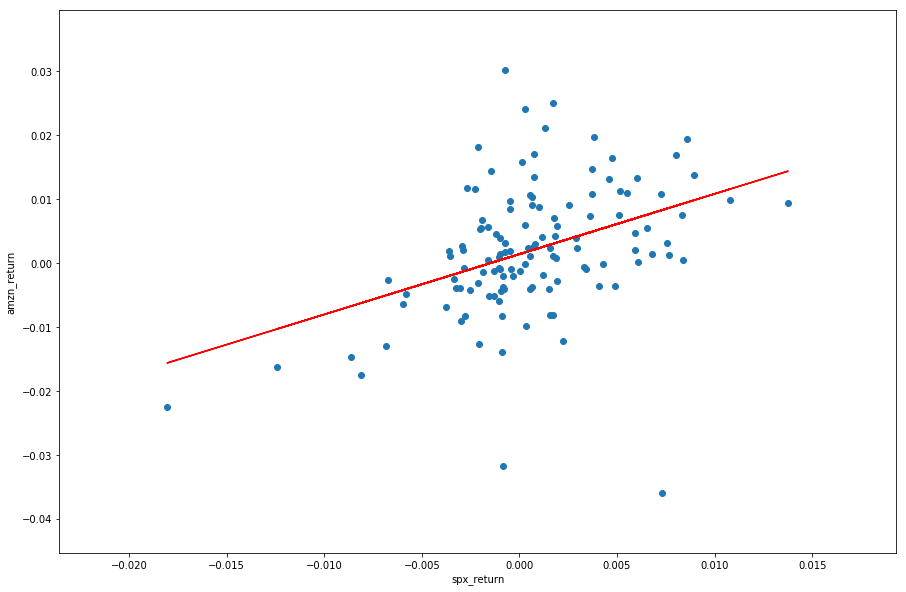

In [68]:
plt.figure(figsize = (15,10))
plt.scatter(df.spy,df.amzn)
plt.xlabel('spx_return')
plt.ylabel('amzn_return')
plt.plot(df.spy,model.predict(),color = 'red')
plt.show()